# **Import library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# **Half-processed data checking**

In [ ]:
df = pd.read_csv("GlobalWeatherRepository - Copy (2).csv", delimiter=';')

In [ ]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,3452,6918,Asia,1693301400,29/08/2023 14:00,288,838,Sunny,...,79,111,1,1,05:24:00,18:24:00,17:39:00,02:48:00,Waxing Gibbous,93
1,Albania,Tirana,4133,1982,Europe/Tirane,1693301400,29/08/2023 11:30,270,806,Partly cloudy,...,282,296,2,3,06:04:00,19:19:00,18:50:00,03:25:00,Waxing Gibbous,93
2,Algeria,Algiers,3676,305,Africa/Algiers,1693301400,29/08/2023 10:30,280,824,Partly cloudy,...,64,79,1,1,06:16:00,19:21:00,18:46:00,03:50:00,Waxing Gibbous,93
3,Andorra,Andorra La Vella,425,152,Europe/Andorra,1693301400,29/08/2023 11:30,102,504,Sunny,...,5,8,1,1,07:16:00,20:34:00,20:08:00,04:38:00,Waxing Gibbous,93
4,Angola,Luanda,-884,1323,Africa/Luanda,1693301400,29/08/2023 10:30,250,770,Partly cloudy,...,1396,2033,4,10,06:11:00,18:06:00,16:43:00,04:41:00,Waxing Gibbous,93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35671 entries, 0 to 35670
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country                       35671 non-null  object
 1   location_name                 35671 non-null  object
 2   latitude                      35671 non-null  int64 
 3   longitude                     35671 non-null  int64 
 4   timezone                      35671 non-null  object
 5   last_updated_epoch            35671 non-null  int64 
 6   last_updated                  35671 non-null  object
 7   temperature_celsius           35671 non-null  int64 
 8   temperature_fahrenheit        35671 non-null  int64 
 9   condition_text                35671 non-null  object
 10  wind_mph                      35671 non-null  int64 
 11  wind_kph                      35671 non-null  int64 
 12  wind_degree                   35671 non-null  int64 
 13  wind_direction  

In [ ]:
df2 = df[df['timezone'] == 'Asia']

In [ ]:
df2.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,3452,6918,Asia,1693301400,29/08/2023 14:00,288,838,Sunny,...,79,111,1,1,05:24:00,18:24:00,17:39:00,02:48:00,Waxing Gibbous,93
7,Armenia,Yerevan,4018,4451,Asia,1693301400,29/08/2023 13:30,310,878,Partly cloudy,...,50,62,1,1,06:26:00,19:39:00,19:05:00,03:45:00,Waxing Gibbous,93
10,Azerbaijan,Baku,404,4988,Asia,1693301400,29/08/2023 13:30,310,878,Sunny,...,56,68,1,1,06:04:00,19:18:00,18:44:00,03:21:00,Waxing Gibbous,93
12,Bahrain,Manama,2624,5058,Asia,1693301400,29/08/2023 12:30,380,1004,Sunny,...,693,1529,4,9,05:16:00,18:01:00,17:07:00,02:58:00,Waxing Gibbous,93
13,Bangladesh,Dhaka,2372,9041,Asia,1693301400,29/08/2023 15:30,340,932,Cloudy,...,848,956,4,10,05:39:00,18:19:00,17:18:00,03:17:00,Waxing Gibbous,93


In [ ]:
df2.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,3452,6918,Asia,1693301400,29/08/2023 14:00,288,838,Sunny,...,79,111,1,1,05:24:00,18:24:00,17:39:00,02:48:00,Waxing Gibbous,93
7,Armenia,Yerevan,4018,4451,Asia,1693301400,29/08/2023 13:30,310,878,Partly cloudy,...,50,62,1,1,06:26:00,19:39:00,19:05:00,03:45:00,Waxing Gibbous,93
10,Azerbaijan,Baku,404,4988,Asia,1693301400,29/08/2023 13:30,310,878,Sunny,...,56,68,1,1,06:04:00,19:18:00,18:44:00,03:21:00,Waxing Gibbous,93
12,Bahrain,Manama,2624,5058,Asia,1693301400,29/08/2023 12:30,380,1004,Sunny,...,693,1529,4,9,05:16:00,18:01:00,17:07:00,02:58:00,Waxing Gibbous,93
13,Bangladesh,Dhaka,2372,9041,Asia,1693301400,29/08/2023 15:30,340,932,Cloudy,...,848,956,4,10,05:39:00,18:19:00,17:18:00,03:17:00,Waxing Gibbous,93


In [ ]:
df2['timezone'].value_counts()

,count
timezone,
Asia,8597


In [ ]:
df2 = df2.drop(columns = 'timezone')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8597 entries, 0 to 35668
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country                       8597 non-null   object
 1   location_name                 8597 non-null   object
 2   latitude                      8597 non-null   int64 
 3   longitude                     8597 non-null   int64 
 4   last_updated_epoch            8597 non-null   int64 
 5   last_updated                  8597 non-null   object
 6   temperature_celsius           8597 non-null   int64 
 7   temperature_fahrenheit        8597 non-null   int64 
 8   condition_text                8597 non-null   object
 9   wind_mph                      8597 non-null   int64 
 10  wind_kph                      8597 non-null   int64 
 11  wind_degree                   8597 non-null   int64 
 12  wind_direction                8597 non-null   object
 13  pressure_mb           

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7993 entries, 0 to 35664
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country                       7993 non-null   object
 1   location_name                 7993 non-null   object
 2   latitude                      7993 non-null   int64 
 3   longitude                     7993 non-null   int64 
 4   last_updated_epoch            7993 non-null   int64 
 5   last_updated                  7993 non-null   object
 6   temperature_celsius           7993 non-null   int64 
 7   temperature_fahrenheit        7993 non-null   int64 
 8   condition_text                7993 non-null   object
 9   wind_mph                      7993 non-null   int64 
 10  wind_kph                      7993 non-null   int64 
 11  wind_degree                   7993 non-null   int64 
 12  wind_direction                7993 non-null   object
 13  pressure_mb           

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in df2:
  # print(i) #kalo mo ngecek aja
  if df2[i].dtypes == 'object':
    df2[i] = label_encoder.fit_transform(df2[i])

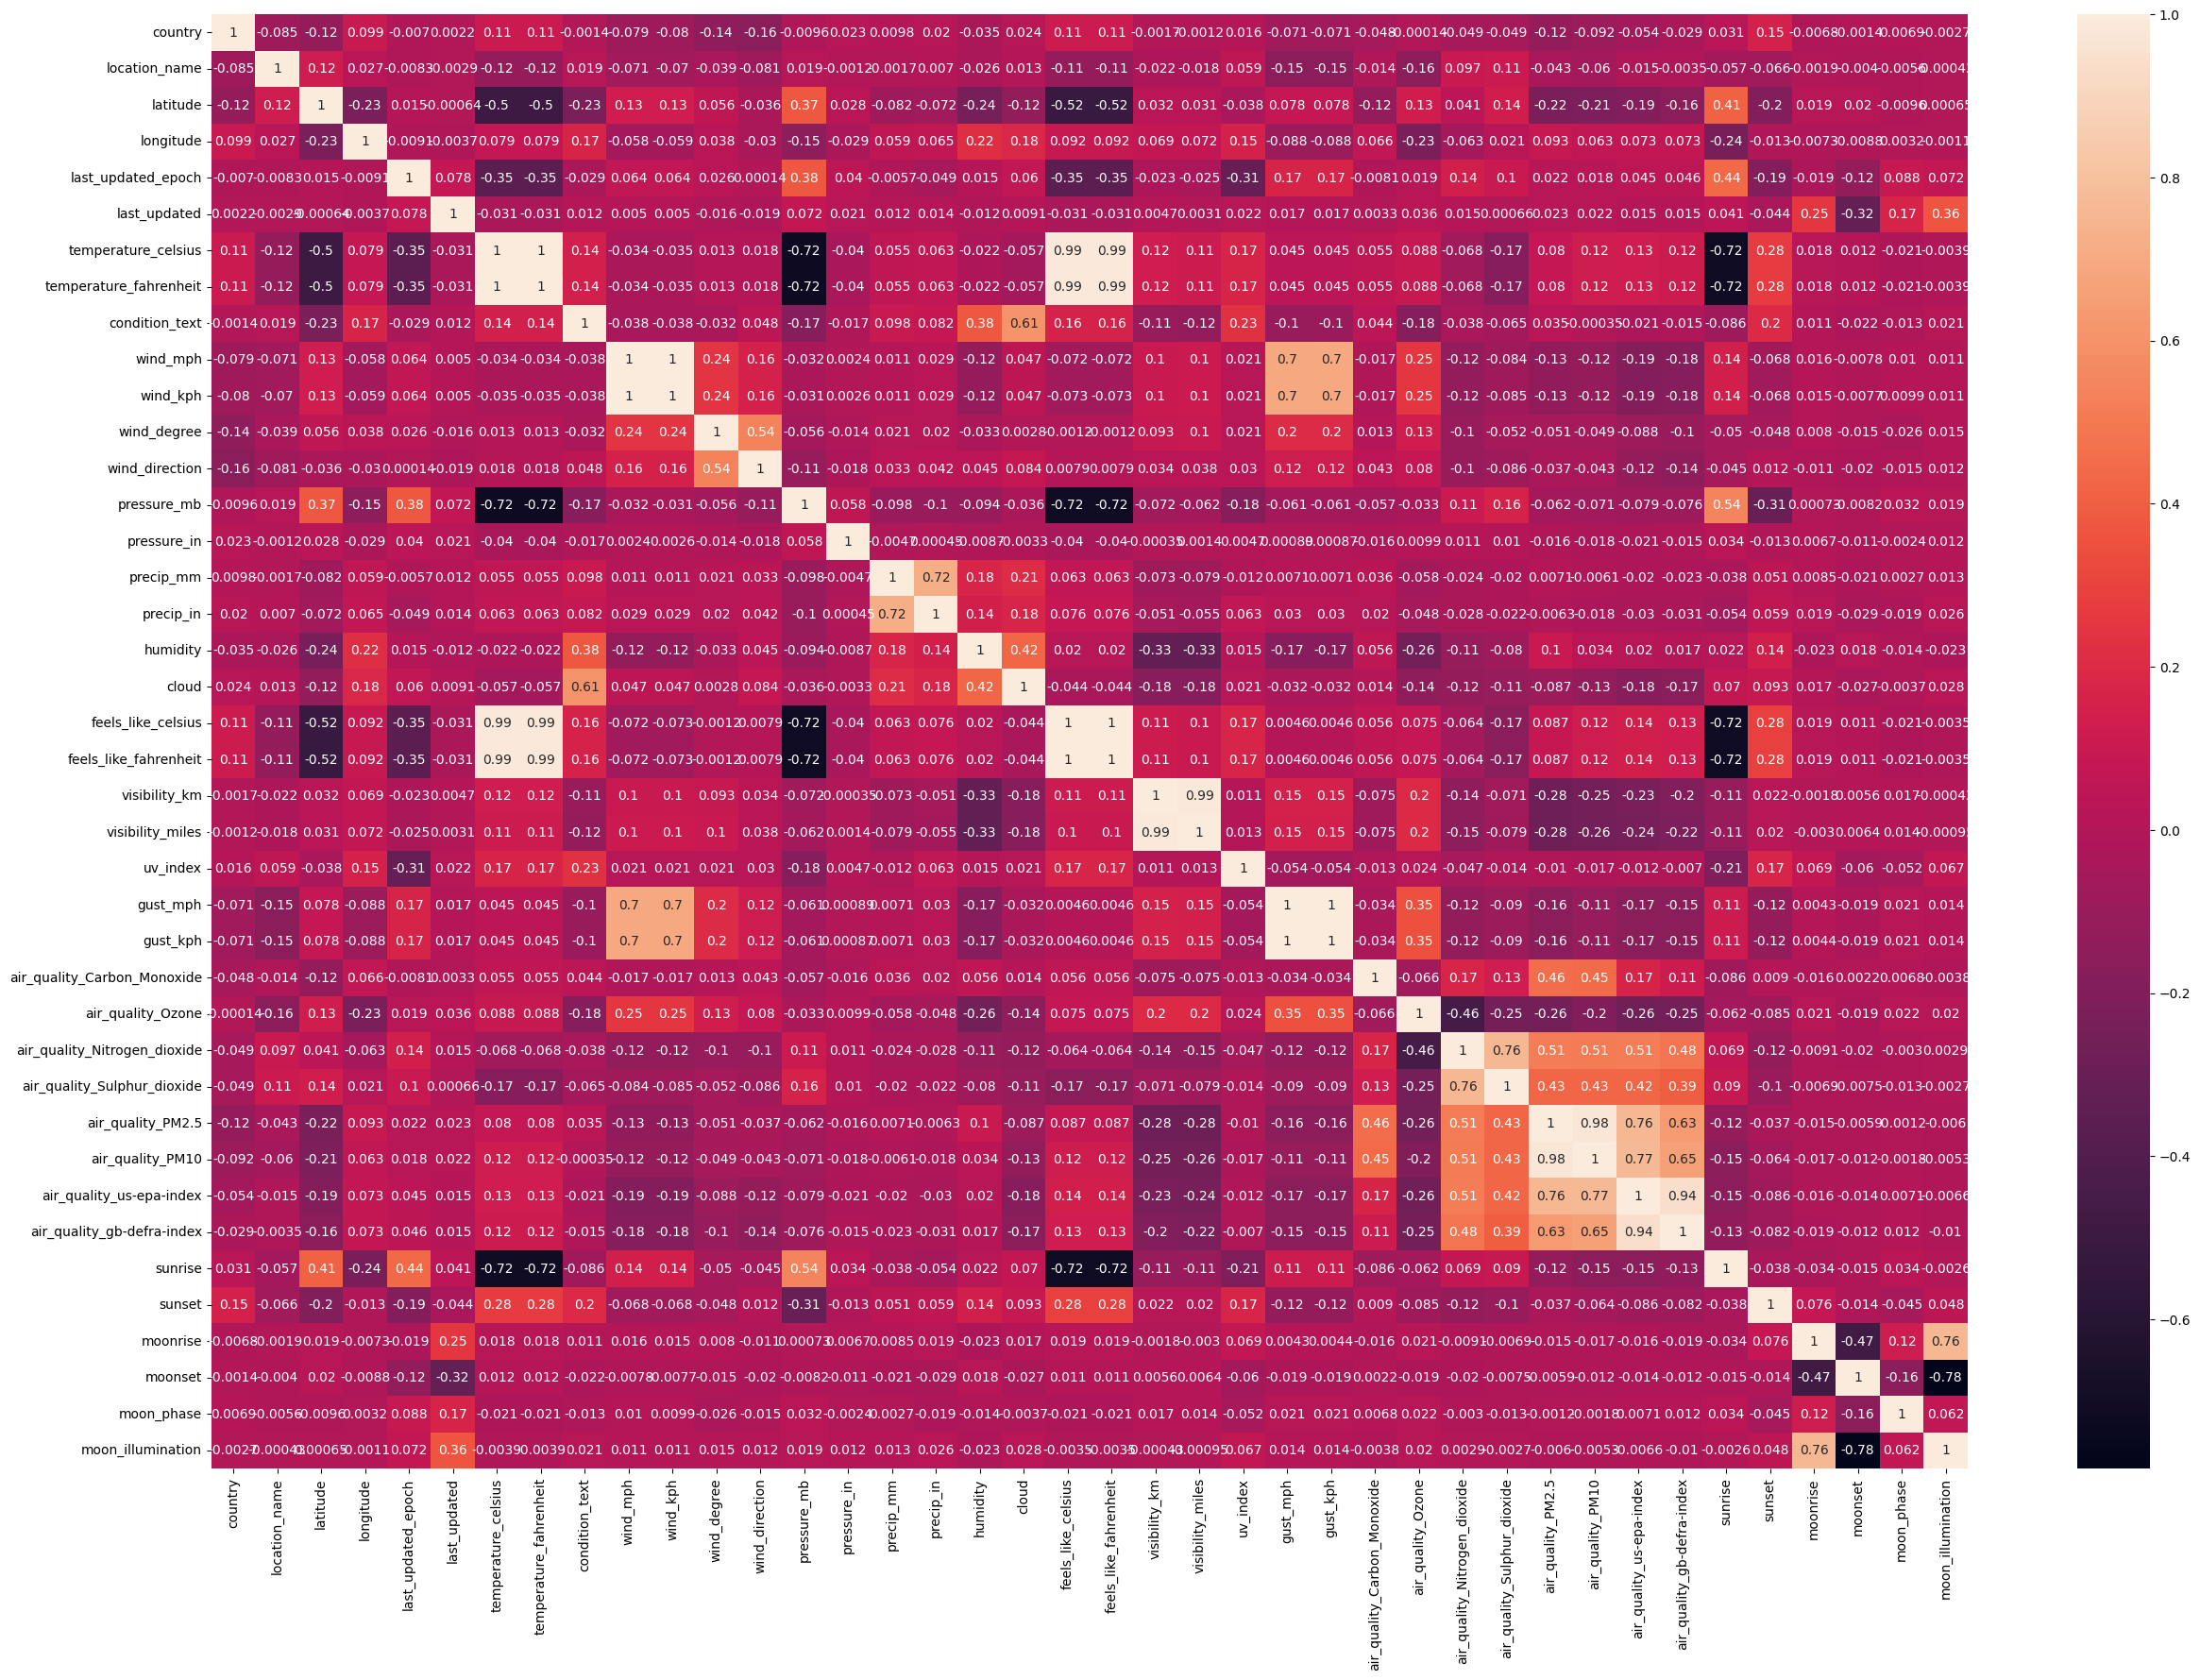

In [ ]:


plt.figure(figsize = (30,20))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [ ]:
df3 = df2.drop(columns = ['temperature_fahrenheit', 'wind_kph', 'precip_in', 'feels_like_fahrenheit', 'visibility_miles', 'gust_kph'])

In [ ]:
df3.head()

,country,location_name,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_mph,wind_degree,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,0,24,3452,6918,1693301400,2303,288,40,72,74,...,79,111,1,1,31,117,1047,166,7,93
7,1,50,4018,4451,1693301400,2301,310,31,56,170,...,50,62,1,1,93,192,1133,223,7,93
10,2,6,404,4988,1693301400,2301,310,40,136,360,...,56,68,1,1,71,171,1112,199,7,93
12,3,29,2624,5058,1693301400,2298,380,40,81,60,...,693,1529,4,9,23,94,1015,176,7,93
13,4,16,2372,9041,1693301400,2308,340,4,34,259,...,848,956,4,10,46,112,1026,195,7,93


In [ ]:
df3.shape

(7993, 34)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7993 entries, 0 to 35664
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   country                       7993 non-null   int64
 1   location_name                 7993 non-null   int64
 2   latitude                      7993 non-null   int64
 3   longitude                     7993 non-null   int64
 4   last_updated_epoch            7993 non-null   int64
 5   last_updated                  7993 non-null   int64
 6   temperature_celsius           7993 non-null   int64
 7   condition_text                7993 non-null   int64
 8   wind_mph                      7993 non-null   int64
 9   wind_degree                   7993 non-null   int64
 10  wind_direction                7993 non-null   int64
 11  pressure_mb                   7993 non-null   int64
 12  pressure_in                   7993 non-null   int64
 13  precip_mm                     7993 no

In [ ]:
x = df3.drop(columns = 'condition_text')
y = df3['condition_text']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7993 entries, 0 to 35664
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   country                       7993 non-null   int64
 1   location_name                 7993 non-null   int64
 2   latitude                      7993 non-null   int64
 3   longitude                     7993 non-null   int64
 4   last_updated_epoch            7993 non-null   int64
 5   last_updated                  7993 non-null   int64
 6   temperature_celsius           7993 non-null   int64
 7   wind_mph                      7993 non-null   int64
 8   wind_degree                   7993 non-null   int64
 9   wind_direction                7993 non-null   int64
 10  pressure_mb                   7993 non-null   int64
 11  pressure_in                   7993 non-null   int64
 12  precip_mm                     7993 non-null   int64
 13  humidity                      7993 no

# **Train-val-test splitting**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
print("Jumlah data di set training (x_train):", x_train.shape[0])
print("Jumlah data di set training (y_train):", y_train.shape[0])
print("Jumlah data di set validasi (x_val):", x_val.shape[0])
print("Jumlah data di set validasi (y_val):", y_val.shape[0])
print("Jumlah data di set testing (x_test):", x_test.shape[0])
print("Jumlah data di set testing (y_test):", y_test.shape[0])

Jumlah data di set training (x_train): 5115
Jumlah data di set training (y_train): 5115
Jumlah data di set validasi (x_val): 1279
Jumlah data di set validasi (y_val): 1279
Jumlah data di set testing (x_test): 1599
Jumlah data di set testing (y_test): 1599


# **Modelling**

In [ ]:
def train_and_evaluate_model(model, model_name):
    model.fit(x_train, y_train)

    y_predict_train = model.predict(x_train)
    y_predict_val = model.predict(x_val)
    y_predict_test = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_predict_train)
    val_accuracy = accuracy_score(y_val, y_predict_val)
    test_accuracy = accuracy_score(y_test, y_predict_test)

    return train_accuracy, val_accuracy, test_accuracy

In [ ]:
dtModel = DecisionTreeClassifier()
dtModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
rfModel = RandomForestClassifier(n_estimators=10)
rfModel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

# **Model comparison and validation**

In [ ]:
y_predict_dt = dtModel.predict(x_val)
y_predict_rf = rfModel.predict(x_val)

In [ ]:


# Decision Tree
accuracyDT = accuracy_score(y_val, y_predict_dt)
print("Accuracy by Decision Tree:", accuracyDT * 100,"%")

# Random Forest
accuracyRF = accuracy_score(y_val, y_predict_rf)
print("Accuracy by Random Forest:", accuracyRF* 100,"%")

Accuracy by Decision Tree: 84.59734167318217 %
Accuracy by Random Forest: 87.0992963252541 %


In [ ]:
rfModel = RandomForestClassifier(n_estimators=100)
rfModel.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict_dt = dtModel.predict(x_val)
y_predict_rf = rfModel.predict(x_val)

# **model evaluation**

In [ ]:


# Decision Tree
accuracyDT = accuracy_score(y_val, y_predict_dt)
print("Accuracy by Decision Tree:", accuracyDT * 100,"%")

# Random Forest
accuracyRF = accuracy_score(y_val, y_predict_rf)
print("Accuracy by Random Forest:", accuracyRF* 100,"%")

Accuracy by Decision Tree: 84.59734167318217 %
Accuracy by Random Forest: 87.72478498827209 %


# **Model evaluation**

In [ ]:
y_predict_dt = dtModel.predict(x_test)
y_predict_rf = rfModel.predict(x_test)

In [ ]:


# Decision Tree
accuracyDT = accuracy_score(y_test, y_predict_dt)
print("Accuracy by Decision Tree:", accuracyDT * 100,"%")

# Random Forest
accuracyRF = accuracy_score(y_test, y_predict_rf)
print("Accuracy by Random Forest:", accuracyRF* 100,"%")

Accuracy by Decision Tree: 87.86741713570981 %
Accuracy by Random Forest: 89.80612883051907 %


conclusion: Due to the slight difference in accuracy on the new data, the choice of model for this case heavily depends on the developer. If the developer does not mind heavy computation (using Random Forest with 100 trees), then Random Forest is a good option. If computational concerns can be disregarded, Random Forest is the better choice.